In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

In [17]:
data=pd.read_csv("bmi.csv")

In [19]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [21]:
data.tail()

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [23]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [25]:
data.isnull()

,Gender,Height,Weight,Index
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
495,False,False,False,False
496,False,False,False,False
497,False,False,False,False
498,False,False,False,False


In [27]:
data.columns

Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')

In [29]:
#making gender into 1,0. 1=male,0=female
gender = LabelEncoder()
data['Gender'] = gender.fit_transform(data['Gender'])

In [31]:
data

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3
...,...,...,...,...
495,0,150,153,5
496,0,184,121,4
497,0,141,136,5
498,1,150,95,5


In [33]:
# Binning the 'Index' column into categories
bins = [-1, 0, 1, 2, 3, 4, 5]
health = ['malnourished', 'underweight', 'fit', 'slightly_overweight', 'overweight', 'extremely_overweight']
data['Index'] = pd.cut(data['Index'], bins=bins, labels=health)

In [35]:
data.dropna(subset=['Index'], inplace=True)

In [37]:
data

,Gender,Height,Weight,Index
0,1,174,96,overweight
1,1,189,87,fit
2,0,185,110,overweight
3,0,195,104,slightly_overweight
4,1,149,61,slightly_overweight
...,...,...,...,...
495,0,150,153,extremely_overweight
496,0,184,121,overweight
497,0,141,136,extremely_overweight
498,1,150,95,extremely_overweight


In [39]:
# Check value counts of categories and gender
data['Index'].value_counts()
data['Gender'].value_counts()

Gender
0    255
1    245
Name: count, dtype: int64

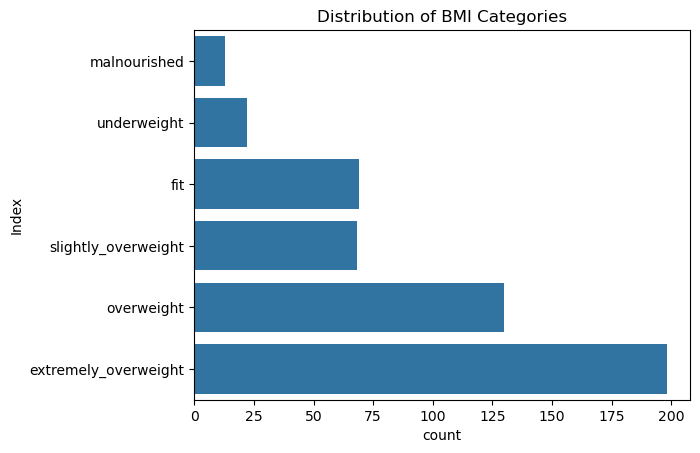

In [41]:

# Visualize the data
sns.countplot(data['Index'])
plt.title('Distribution of BMI Categories')
plt.show()

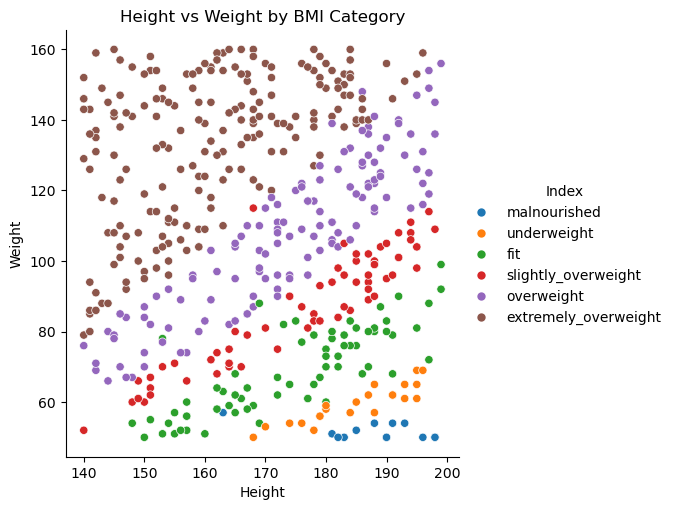

In [43]:

sns.relplot(x='Height', y='Weight', hue='Index', data=data)
plt.title('Height vs Weight by BMI Category')
plt.show()

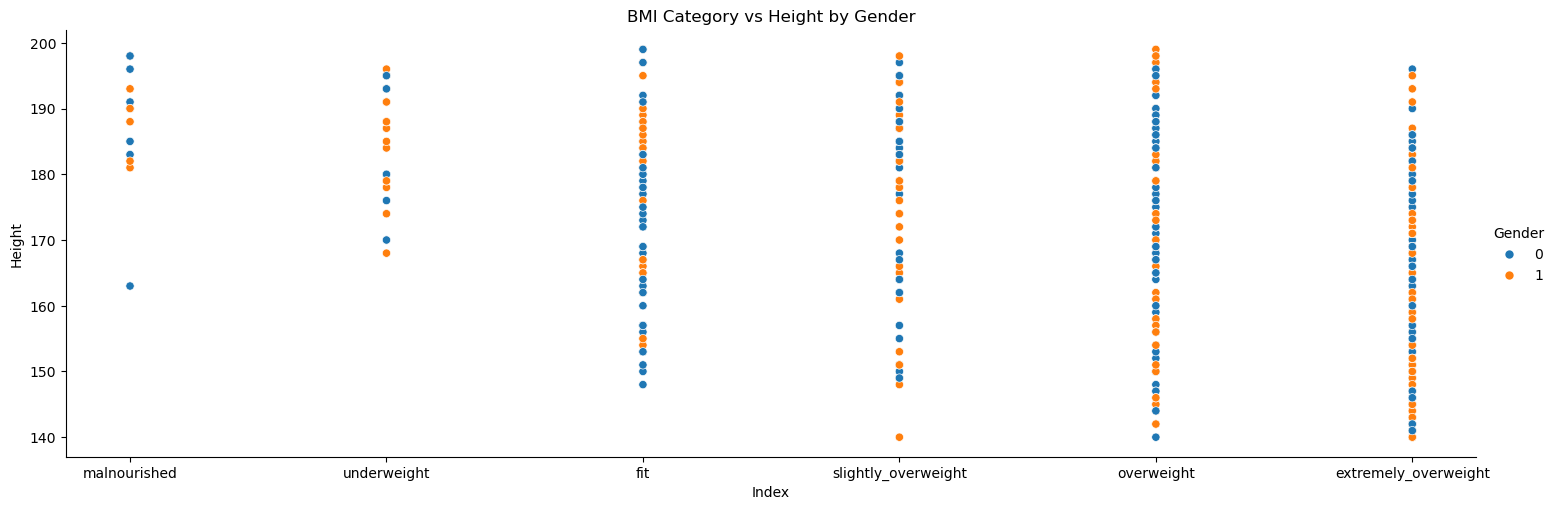

In [45]:

sns.relplot(x='Index', y='Height', hue='Gender', data=data, height=5, aspect=3)
plt.title('BMI Category vs Height by Gender')
plt.show()

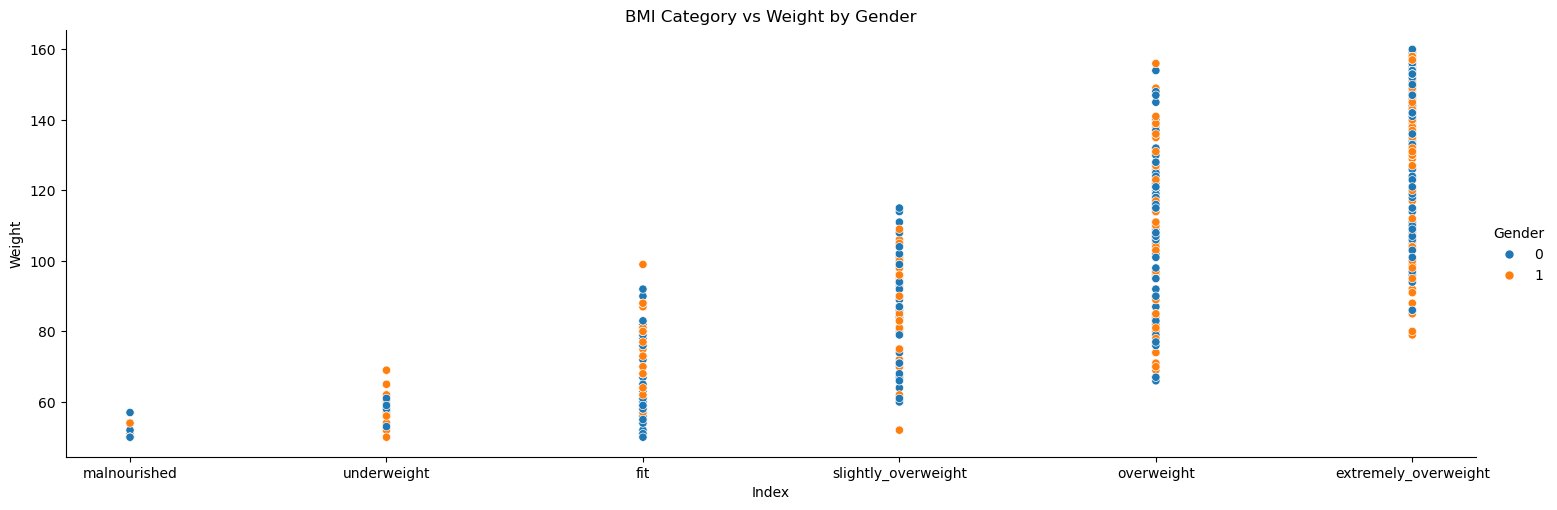

In [47]:
sns.relplot(x='Index', y='Weight', hue='Gender', data=data, height=5, aspect=3)
plt.title('BMI Category vs Weight by Gender')
plt.show()

In [49]:
# Split the data into features and target variable
X = data.drop('Index', axis=1)
y = data['Index']

In [51]:

# Standardize the features
s = StandardScaler()
X = s.fit_transform(X)


In [53]:
# Train the SVM model
clf = svm.SVC(kernel='rbf', C=10, gamma=0.1)



In [55]:
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

In [57]:
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation of Accuracy:", np.std(cv_scores))



Cross-Validation Accuracy Scores: [0.95 0.91 0.9  0.88 0.92]
Mean Accuracy: 0.9119999999999999
Standard Deviation of Accuracy: 0.023151673805580437


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [61]:
clf.fit(X_train, y_train)

SVC(C=10, gamma=0.1)

In [63]:
pred = clf.predict(X_test)

In [65]:
print("Classification Report:")
print(classification_report(y_test, pred))


Classification Report:
                      precision    recall  f1-score   support

extremely_overweight       0.95      0.97      0.96        36
                 fit       0.90      0.90      0.90        10
        malnourished       1.00      0.33      0.50         3
          overweight       0.93      0.88      0.90        32
 slightly_overweight       0.82      0.93      0.88        15
         underweight       0.60      0.75      0.67         4

            accuracy                           0.90       100
           macro avg       0.87      0.79      0.80       100
        weighted avg       0.91      0.90      0.90       100



In [67]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred))

Confusion Matrix:
[[35  0  0  1  0  0]
 [ 0  9  0  0  1  0]
 [ 0  0  1  0  0  2]
 [ 2  0  0 28  2  0]
 [ 0  0  0  1 14  0]
 [ 0  1  0  0  0  3]]


In [69]:
print("Accuracy Score:", accuracy_score(y_test, pred))

Accuracy Score: 0.9


In [57]:
# Test with new input
a = [[1, 140, 48]]  # Gender (0 for male), Height (140 cm), Weight (48 kg)
b = s.transform(a)
predicted_category = clf.predict(b)
print("Predicted Category:", predicted_category)

Predicted Category: ['slightly_overweight']


C:\Users\varsh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [59]:

a = [[1, 189, 167]] 
b = s.transform(a)
predicted_category = clf.predict(b)
print("Predicted Category:", predicted_category)

Predicted Category: ['extremely_overweight']


C:\Users\varsh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [61]:

a = [[1, 175, 80]] 
b = s.transform(a)
predicted_category = clf.predict(b)
print("Predicted Category:", predicted_category)

Predicted Category: ['slightly_overweight']


C:\Users\varsh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [71]:

a = [[1, 173, 74]] 
b = s.transform(a)
predicted_category = clf.predict(b)
print("Predicted Category:", predicted_category)

Predicted Category: ['fit']


C:\Users\varsh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
